### Group ID: DRL Group 89

**List only the BITS (Name) of active contributors in this assignment:**

|#|NAME|BITS-ID                 |
|-|---|------------------------|
|1.|POOJA PATILA| 2023aa05194     |
|2.|KASHYAP RAJPUROHIT| 2023ab05027     |
|3.|RAMAKRISHNA C| 2023ab05177   |
|4.|MANOJ KUMAR PRADHAN| 2023aa05073|


# Problem Statement

The objective of the problem is to implement an Actor-Critic reinforcement learning algorithm to optimize energy consumption in a building. The agent should learn to adjust the temperature settings dynamically to minimize energy usage while maintaining comfortable indoor conditions.

#### Dataset Details
Dataset: https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction

This dataset contains energy consumption data for a residential building, along with various environmental and operational factors.

Data Dictionary:
* Appliances:       Energy use in Wh
* lights:           Energy use of light fixtures in the house in Wh
* T1 - T9:          Temperatures in various rooms and outside
* RH_1 to RH_9:     Humidity measurements in various rooms and outside
* Visibility:       Visibility in km
* Tdewpoint:       Dew point temperature
* Pressure_mm_hgg:  Pressure in mm Hg
* Windspeed:        Wind speed in m/s

#### Environment Details
**State Space:**
The state space consists of various features from the dataset that impact energy consumption and comfort levels.

* Current Temperature (T1 to T9): Temperatures in various rooms and outside.
* Current Humidity (RH_1 to RH_9): Humidity measurements in different locations.
* Visibility (Visibility): Visibility in meters.
* Dew Point (Tdewpoint): Dew point temperature.
* Pressure (Press_mm_hg): Atmospheric pressure in mm Hg.
* Windspeed (Windspeed): Wind speed in m/s.

Total State Vector Dimension: Number of features = 9 (temperature) + 9 (humidity) + 1 (visibility) + 1 (dew point) + 1 (pressure) + 1 (windspeed) = 22 features

**Target Variable:** Appliances (energy consumption in Wh).

**Action Space:**
The action space consists of discrete temperature adjustments:
* Action 0: Decrease temperature by 1°C
* Action 1: Maintain current temperature
* Action 2: Increase temperature by 1°C


- If the action is to decrease the temperature by 1°C, you'll adjust each temperature feature (T1 to T9) down by 1°C.
- If the action is to increase the temperature by 1°C, you'll adjust each temperature feature (T1 to T9) up by 1°C.
- Other features remain unchanged.

**Policy (Actor):** A neural network that outputs a probability distribution over possible temperature adjustments.

**Value function (Critic):** A neural network that estimates the expected cumulative reward (energy savings) from a given state.

**Reward function:**
The reward function should reflect the overall comfort and energy efficiency based on all temperature readings. i.e., balance between minimising temperature deviations and minimizing energy consumption.

* Calculate the penalty based on the deviation of each temperature from the target temperature and then aggregate these penalties.
* Measure the change in energy consumption before and after applying the RL action.
* Combine the comfort penalty and energy savings to get the final reward.

*Example:*

Target temperature=22°C

Initial Temperatures: T1=23, T2=22, T3=21, T4=23, T5=22, T6=21, T7=24, T8=22, T9=23

Action Taken: Decrease temperature by 1°C for each room

Resulting Temperatures: T1 = 22, T2 = 21, T3 = 20, T4 = 22, T5 = 21, T6 = 20, T7 = 23, T8 = 21, T9 = 22

Energy Consumption: 50 Wh (before RL adjustment) and 48 Wh (after RL adjustment)
* Energy Before (50 Wh): Use the energy consumption from the dataset at the current time step.
* Energy After (48 Wh): Use the energy consumption from the dataset at the next time step (if available).

Consider only temperature features for deviation calculation.

Deviation = abs (Ti− Ttarget )

Deviations=[ abs(22−22), abs(21−22), abs(20−22), abs(22−22),  abs(21−22), abs(20−22), abs(23−22), abs(21−22), abs(22−22) ]

Deviations = [0, 1, 2, 0, 1, 2, 1, 1, 0], Sum of deviations = 8

Energy Savings = Energy Before−Energy After = 50 – 48 = 2Wh

Reward= −Sum of Deviations + Energy Savings = -8+6 = -2

#### Expected Outcomes
1. Pre-process the dataset to handle any missing values and create training and testing sets.
2. Implement the Actor-Critic algorithm using TensorFlow.
3. Train the model over 500 episodes to minimize energy consumption while maintaining an indoor temperature of 22°C.
4. Plot the total reward obtained in each episode to evaluate the learning progress.
5. Evaluate the performance of the model on test set to measure its performance
6. Provide graphs showing the convergence of the Actor and Critic losses.
7. Plot the learned policy by showing the action probabilities across different state values (e.g., temperature settings).
8. Provide an analysis on a comparison of the energy consumption before and after applying the reinforcement learning algorithm.


#### Code Execution

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('energydata_complete.csv')

# Check and replace missing values
# Pre process the data set to get the features and target and scale them

features = ["T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","Press_mm_hg","Windspeed","Visibility","Tdewpoint"]
target= ["Appliances"]

temp_indices = [0,2,4,6,8,10,12,14,16]

# Columns to be scaled
scale_columns = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9","Press_mm_hg","Windspeed","Visibility","Tdewpoint"]
other_columns = [col for col in data.columns if col not in scale_columns]

# Define the ColumnTransformer
ct = ColumnTransformer(
    [('scaler', StandardScaler(), scale_columns)],
    remainder='passthrough'  # This will leave the other columns unchanged
)

# Fit and transform the data
data_scaled = ct.fit_transform(data)

# The result is a NumPy array; let's convert it back to a DataFrame
scaled_columns = scale_columns + other_columns
df_scaled = pd.DataFrame(data_scaled, columns=scaled_columns)

X=df_scaled[features].values
y=df_scaled[target].values

# Split the data to training and testing sets (80% for training, 20% for testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the model
model = RandomForestRegressor(n_estimators=200, random_state=42)
# Train the model using the scaled training data
y_train = y_train.ravel()
model.fit(X_train_scaled, y_train)
y_pred_training = model.predict(X_train_scaled)
# Make predictions on the test set
y_pred_test = model.predict(X_test_scaled)
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error on test set: {mse}')

# Organize the state space and energy space into a list of dictionaries
def organize_data(X, y):
    return [{'state': state.tolist(), 'energy': int(energy.item())} for state, energy in zip(X, y)]

# Organize the data
energy_data = organize_data(X, y)

Mean Squared Error on test set: 5210.274018875096


#### Defining Actor Critic Model using tensorflow (1 M)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the actor model
def create_actor():
    model = models.Sequential()
    model.add(layers.Dense(24, activation='relu', input_shape=(22,)))
    model.add(layers.Dense(24, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # 3 actions: decrease, maintain, increase
    return model

# Define the critic model
def create_critic():
    model = models.Sequential()
    model.add(layers.Dense(24, activation='relu', input_shape=(22,)))
    model.add(layers.Dense(24, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))  # Value function output
    return model

# Hyperparameters
gamma = 0.99  # Discount factor
learning_rate = 0.001

# Create models
actor = create_actor()
critic = create_critic()

# Compile models
actor.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy')
critic.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
               loss='mean_squared_error')


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Reward Function (0.5 M)

In [ ]:
# Function to calculate reward

def calculate_reward(temperatures, energy_before, energy_after, target_temp=22):
    deviations = [abs(t - target_temp) for t in temperatures]
    sum_deviations = sum(deviations)
    energy_savings = energy_before - energy_after
    reward = -sum_deviations + energy_savings
    return reward

#### Environment Simulation (0.5 M)


In [ ]:
### Environment Simulation

import numpy as np
import gym
from gym import spaces

temp_indices = [0,2,4,6,8,10,12,14,16]

class EnergyEnvironment(gym.Env):
    def __init__(self, initial_state, target_temperature, energy_data):
        super(EnergyEnvironment, self).__init__()
        self.initial_state = np.array(initial_state)
        self.state = initial_state
        self.target_temperature = target_temperature
        self.energy_data = energy_data
        self.current_step = 0

        # Define the action space: 0 (decrease temp), 1 (maintain temp), 2 (increase temp)
        self.action_space = spaces.Discrete(3)

        # Define the observation space: 22 features
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(22,), dtype=np.float32)

    def step(self, action):
        # Apply action to temperature features

        if action == 0:
            self.state[temp_indices] -= 1
        elif action == 2:
            self.state[temp_indices] += 1

        # Calculate reward
        reward = self._calculate_reward()

        # Update state
        self.current_step += 1
        done = self.current_step >= len(self.energy_data) - 1
        info = {}

        # Get next state
        if not done:
            self.state = np.array(self.energy_data[self.current_step]['state'])

        return self.state, reward, done, info

    def reset(self):
        self.state = self.initial_state
        self.current_step = 0
        return self.state

    def _calculate_reward(self):
        # Calculate temperature deviations
        deviations = np.abs(self.state[temp_indices] - self.target_temperature)
        sum_deviations = np.sum(deviations)

        # Calculate energy savings
        energy_before = self.energy_data[self.current_step]['energy']
        energy_after = self.energy_data[self.current_step + 1]['energy'] if self.current_step < len(self.energy_data) - 1 else energy_before
        energy_savings = energy_before - energy_after

        # Calculate reward
        reward = -sum_deviations + energy_savings
        return reward

# Example usage
initial_state = X[0]
target_temperature = 22

env = EnergyEnvironment(initial_state, target_temperature, energy_data)

# Example interaction with the environment
state = env.reset()
done = False

while not done:
    action = env.action_space.sample()  # Take a random action
    next_state, reward, done, info = env.step(action)
    print(f"Action: {action}, Reward: {reward}, Next State: {next_state}")


Action: 2, Reward: -34.49333333333333, Next State: [19.89        1.61680671 19.2         1.05709748 19.79        1.70456601
 19.          1.6045285  17.16666667  0.47116038  6.83333333  0.94559165
 17.2         1.2068254  18.2         1.13455378 17.06666667  0.96536273
 -2.96281279  1.07170342  1.76658397  0.34313479]
Action: 1, Reward: -33.65333333333327, Next State: [19.89        1.51795932 19.2         1.03354953 19.79        1.74860768
 18.92666667  1.58091757 17.16666667  0.45896769  6.56        0.91648425
 17.2         1.18205717 18.2         1.10903167 17.          0.95090975
 -2.94929791  0.93571331  1.44157151  0.31929428]
Action: 2, Reward: -35.066666666666606, Next State: [19.89        1.45932104 19.2         1.02453987 19.79        1.76909217
 18.89        1.54252582 17.16666667  0.45896769  6.43333333  0.92504525
 17.13333333  1.15402997 18.1         1.08223345 17.          0.92682144
 -2.93578303  0.79972319  1.11655906  0.29545377]
Action: 2, Reward: -45.39666666666667, 

#### Implementation of Training Function (2 M)

In [ ]:
from contextlib import contextmanager
import os
import sys

# Context manager to suppress output
@contextmanager
def suppress_output():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        old_stderr = sys.stderr
        sys.stdout = devnull
        sys.stderr = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout
            sys.stderr = old_stderr

In [ ]:
import numpy as np
import random

# Define the train_actor function with tf.function outside the loop
@tf.function
def train_actor(state_input, action, advantages):
    with tf.GradientTape() as tape:
        action_probs = actor(state_input, training=True)
        action_log_probs = tf.math.log(action_probs[0, action])
        loss = -tf.reduce_mean(action_log_probs * advantages)
    grads = tape.gradient(loss, actor.trainable_variables)
    actor.optimizer.apply_gradients(zip(grads, actor.trainable_variables))
    return loss

# Define the critic training step with tf.function outside the loop
@tf.function
def train_critic(state_input, target):
    with tf.GradientTape() as tape:
        value = critic(state_input, training=True)
        loss = tf.reduce_mean(tf.square(target - value))
    grads = tape.gradient(loss, critic.trainable_variables)
    critic.optimizer.apply_gradients(zip(grads, critic.trainable_variables))
    return loss

# Training loop
num_episodes = 500
rewards_history = []
actor_losses = []
critic_losses = []

for episode in range(num_episodes):
    randomRow = random.randint(0, len(X_train) - 2)
    state = X_train[randomRow]
    currentEnergy = y_pred_training[randomRow]
    state = np.array(state, dtype=np.float32)  # Ensure correct type
    total_reward = 0


    for t in range(200):  # Assuming 100 steps per episode
        state_input = np.expand_dims(state, axis=0)

        with suppress_output():
            action_probs = actor.predict(state_input)

        action = np.random.choice(3, p=action_probs[0])

        new_state = state.copy()
        if action == 0:  # Decrease temperature
            new_state[temp_indices] -= 1
        elif action == 2:  # Increase temperature
            new_state[temp_indices] += 1

        energy_before = currentEnergy

        if (action == 0 or action == 2):
            energy_after = model.predict(new_state.reshape(1,-1))
        else:
            energy_after = currentEnergy

        reward = calculate_reward(new_state[temp_indices], energy_before, energy_after)
        total_reward += reward

        next_state_input = np.expand_dims(new_state, axis=0).astype(np.float32)

        with suppress_output():
            target = reward + gamma * float(critic.predict(next_state_input))

        target = np.array([target], dtype=np.float32)  # Ensure correct shape and type

        critic_loss = train_critic(state_input, target)
        critic_losses.append(critic_loss.numpy())

        with suppress_output():
            current_value = float(critic.predict(state_input))

        advantages = target - current_value
        advantages = np.array([advantages], dtype=np.float32)  # Ensure correct shape and type

        actor_loss = train_actor(state_input, action, advantages)
        actor_losses.append(actor_loss.numpy())

        state = new_state
        currentEnergy = energy_after

    print(f"Episode {episode + 1}: Total Reward: {total_reward}")
    rewards_history.append(total_reward)

print("Training completed.")

Episode 1: Total Reward: [-114967.97038803]
Episode 2: Total Reward: [-80578.55383072]
Episode 3: Total Reward: [-181489.8249115]
Episode 4: Total Reward: [-44840.94545975]
Episode 5: Total Reward: [-35606.33280957]
Episode 6: Total Reward: [-36771.94965668]
Episode 7: Total Reward: [-36620.41639638]
Episode 8: Total Reward: [-36311.73338318]
Episode 9: Total Reward: [-37039.98348846]
Episode 10: Total Reward: [-35906.44930334]
Episode 11: Total Reward: [-36956.86560965]
Episode 12: Total Reward: [-36451.98894348]
Episode 13: Total Reward: [-36798.99930573]
Episode 14: Total Reward: [-36194.01625214]
Episode 15: Total Reward: [-36178.60754089]
Episode 16: Total Reward: [-36827.9334198]
Episode 17: Total Reward: [-36454.79000854]
Episode 18: Total Reward: [-36743.6498558]
Episode 19: Total Reward: [-36457.49996948]
Episode 20: Total Reward: [-36321.96420288]
Episode 21: Total Reward: [-35693.95006256]
Episode 22: Total Reward: [-36563.53842916]
Episode 23: Total Reward: [-36285.47441559

### Plot the convergence of Actor and Critic losses (1 M)

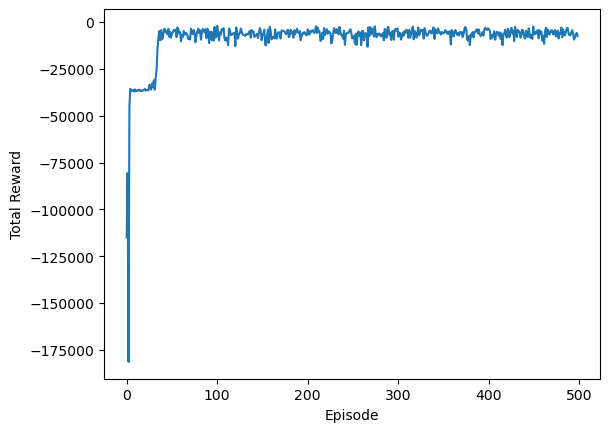

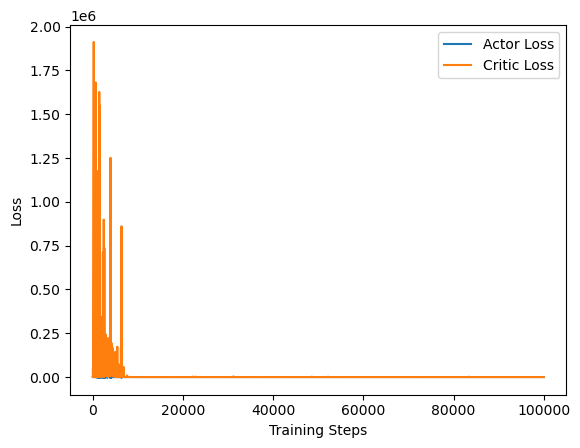

In [ ]:
# Plot total rewards
import matplotlib.pyplot as plt

# # Flatten the first segment
# flattened_array_1 = np.concatenate(rewards_history[0:35])
# # Flatten the second segment
# flattened_array_2 = np.array(rewards_history[36:500])

# # Concatenate both flattened segments
# flattened_array = np.concatenate((flattened_array_1, flattened_array_2))

plt.plot(rewards_history)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

# Plot losses
plt.plot(actor_losses, label='Actor Loss')
plt.plot(critic_losses, label='Critic Loss')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plot the learned policy - by showing the action probabilities across different state values (1 M)

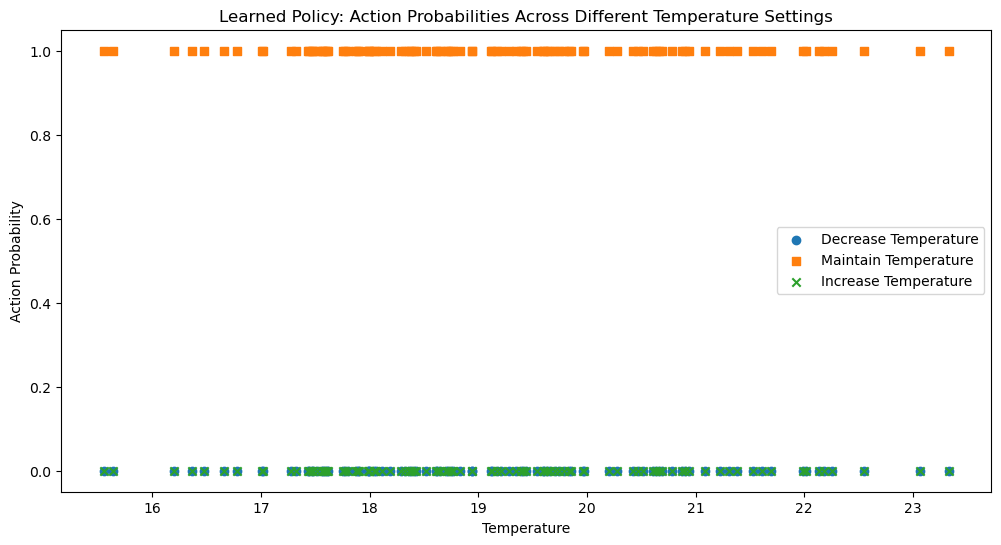

In [ ]:
# Plot the learned policy - by showing the action probabilities across different state values

# From the trained actor model, for each state in training set,
# plot the probability of each action (increasing/decreasing/maintaining) the temperature

action_probabilities = []

averageTemp_In_X_Train = []

# Randomly select 1000 row indices from the array
sample_indices = np.random.choice(X_train.shape[0], size=100, replace=False)

# Extract the rows corresponding to the sampled indices
sampled_rows = X_train[sample_indices]

for row in sampled_rows:
    # Create a state with the current temperature setting
    state = row
    state_input = np.expand_dims(state, axis=0).astype(np.float32)
    averageTemp_In_X_Train.append(np.sum(state[temp_indices])/9)

    with suppress_output():
        action_probs = actor.predict(state_input)

    action_probabilities.append(action_probs[0])

action_probabilities = np.array(action_probabilities)

# Plot the action probabilities
plt.figure(figsize=(12, 6))
plt.scatter(averageTemp_In_X_Train, action_probabilities[:, 0], label='Decrease Temperature', marker='o')
plt.scatter(averageTemp_In_X_Train, action_probabilities[:, 1], label='Maintain Temperature', marker='s')
plt.scatter(averageTemp_In_X_Train, action_probabilities[:, 2], label='Increase Temperature', marker='x')
plt.xlabel('Temperature')
plt.ylabel('Action Probability')
plt.title('Learned Policy: Action Probabilities Across Different Temperature Settings')
plt.legend()
plt.show()


#### Evaluate the performance of the model on test set (0.5 M)

In [ ]:
# Evaluate the model on the test set
def evaluate_model_on_test_set(actor, X_test, y_test, steps_per_episode=100):
    total_reward = 0
    total_energy_consumption = 0
    num_episodes = len(X_test)
    currentEnergy = y_pred_test[0]

    for episode in range(500):
        state = X_test[episode]
        state = np.array(state, dtype=np.float32)

        episode_reward = 0
        episode_energy_consumption = 0

        for t in range(steps_per_episode):
            state_input = np.expand_dims(state, axis=0).astype(np.float32)

            with suppress_output():
                action_probs = actor.predict(state_input)

            action = np.random.choice(3, p=action_probs[0])

            new_state = state.copy()
            if action == 0:  # Decrease temperature
                new_state[temp_indices] -= 1
            elif action == 2:  # Increase temperature
                new_state[temp_indices] += 1

            energy_before = currentEnergy

            if (action == 0 or action == 2):
                energy_after = model.predict(new_state.reshape(1,-1))
            else:
                energy_after = currentEnergy

            reward = calculate_reward(new_state[temp_indices], energy_before, energy_after)
            episode_reward += reward
            episode_energy_consumption += energy_after

            state = new_state

        total_reward += episode_reward
        total_energy_consumption += episode_energy_consumption

    avg_reward = total_reward / num_episodes
    avg_energy_consumption = total_energy_consumption / (num_episodes * steps_per_episode)

    return avg_reward, avg_energy_consumption

# Evaluate the model
avg_reward, avg_energy_consumption = evaluate_model_on_test_set(actor, X_test, y_test)

# Print evaluation results
print(f"Average Reward on Test Set: {avg_reward}")
print(f"Average Energy Consumption on Test Set: {avg_energy_consumption}")


Average Reward on Test Set: -386.8551857418385
Average Energy Consumption on Test Set: 35.273625538383584


In [ ]:
# Function to simulate energy consumption for given policy
def simulate_energy_consumption(policy, num_episodes=500, steps_per_episode=100):
    total_energy_consumption = 0

    for episode in range(num_episodes):
        randomRow = random.randint(0, len(X_train) - 1)
        state = X_train[randomRow]
        state = np.array(state, dtype=np.float32)
        currentEnergy = y_pred_training[randomRow]

        for t in range(steps_per_episode):
            state_input = np.expand_dims(state, axis=0).astype(np.float32)

            if policy == 'random':
                action = np.random.choice(3)
            elif policy == 'learned':
                with suppress_output():
                    action_probs = actor.predict(state_input)
                action = np.random.choice(3, p=action_probs[0])
            else:
                raise ValueError("Unknown policy type")

            new_state = state.copy()
            if action == 0:
                new_state[temp_indices] -= 1
            elif action == 2:
                new_state[temp_indices] += 1

            if (action == 0 or action == 2):
                energy_after = model.predict(new_state.reshape(1,-1))
            else:
                energy_after = currentEnergy

            total_energy_consumption += energy_after

            state = new_state

    avg_energy_consumption = total_energy_consumption / (num_episodes * steps_per_episode)
    return avg_energy_consumption

# Simulate energy consumption before and after RL
avg_energy_before_rl = simulate_energy_consumption(policy='random')
avg_energy_after_rl = simulate_energy_consumption(policy='learned')

# Print results
print(f"Average Energy Consumption Before RL: {avg_energy_before_rl}")
print(f"Average Energy Consumption After RL: {avg_energy_after_rl}")

# Analysis
energy_savings = avg_energy_before_rl - avg_energy_after_rl
print(f"Energy Savings After Applying RL: {energy_savings}")


Average Energy Consumption Before RL: [221.559227]
Average Energy Consumption After RL: 99.53899999999078
Energy Savings After Applying RL: [122.020227]


#### Conclusion (0.5 M)

- The energy consumption has significantly decreased after applying the actor critic reinforcement learning algorithm.
- The actor critic algorithm converged in few episosdes. We took 200 steps per episode and had run 500 episodes. The graphs slighlty vary for each run due to the over all stochastic nature of the algorithm used and tuning the hyper parameters resulted in faster convergence.

In [1]:
!jupyter nbconvert --to PDF "DRL_Assignment2_Group_39.ipynb"

[NbConvertApp] WARNING | pattern 'DRL_Assignment2_Group_39.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
